<a href="https://colab.research.google.com/github/Janebhop/fraud-detection-course/blob/main/notebook/chapter2/Chapter_2_Datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation
reference original article by **Jason Brownlee**
<br>
[How to prepare data for machine learning](https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/)
<br>
[Improve Model Accuracy with Data Pre-Processing](https://machinelearningmastery.com/improve-model-accuracy-with-data-pre-processing/)

## Colab environment setting <a class="anchor" id="bullet-1"></a>

```
# Mount drive
```

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```
# Install package
```

In [ ]:
## install pandas profiling
%%capture
!pip install -U pandas-profiling

```
# insert environment
```

In [2]:
import os,sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

## Data preparation Process <a class="anchor" id="bullet-2"></a>
เป็นการจัดการ data ให้ง่ายต่อการใช้งานอีกทั้งยังช่วยเพิ่มประสิทธิภาพในการทำ Machine Learning (ML) โดยปกติแล้วจะมี 3 ขั้นตอนดังนี้:
- **Step 1: Data Selection** เลือก data สำหรับใช้งาน รวมถึงการ Exploratory Data Analysis (EDA)
- **Step 2: Data Preprocessing** เป็นขั้นตอนในการกำหนด format data, กำจัด missing values 
- **Step 3: Data Transformation** ขั้นตอนนี้เป็นการแปลง attribute เพื่อใช้ในการทำ ML เช่น การ scaling, การทำ aggregation, การใช้ log หรือ exponential function เพื่อปรับ skewness เป็นต้น

In [3]:
import pandas as pd
filePath = '/content/drive/My Drive/paysimdata/PS_20174392719_1491204439457_log.csv'
fulldata = pd.read_csv(filePath)

## Data selection <a class="anchor" id="bullet-3"></a>
เลือก column เพื่อนำมาเป็น attribute 
- **EDA** เป็นการดูข้อมูลในมุมต่างๆเพื่อพิจารณาว่า ข้อมูลมีจำนวนเท่าใด ,ชนิดของข้อมูล, ความสัมพันธ์กัน, รวมถึงการกระจายตัว ในตัวอย่างมีการใช้ [pandas profiling](https://github.com/pandas-profiling/pandas-profiling) ซึ่งเป็น library บน python ที่ใช้ในการ EDA ในมุมมองต่างๆแบบพื้นฐาน

In [4]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
from pandas_profiling import ProfileReport
fulldata.profile_report()

In [5]:
fulldata.head()

step      type    amount  ... newbalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...            0.0        0               0
1     1   PAYMENT   1864.28  ...            0.0        0               0
2     1  TRANSFER    181.00  ...            0.0        1               0
3     1  CASH_OUT    181.00  ...            0.0        1               0
4     1   PAYMENT  11668.14  ...            0.0        0               0

[5 rows x 11 columns]

## Data Preprocessing 

เป็นขั้นตอนการดำเนินการกับข้อมูลเพื่อให้พร้อมใช้สำหรับทำ ML เป็นสิ่งจำเป็นมากสำหรับ model ที่ไม่สามารถดำเนินการกับ attribute ที่ซับซ้อนได้ ดังนั้น การกำหนดข้อมูลเพื่อง่ายต่อการนำไปใช้งานจึงมีความสำคัญในการเพิ่มประสิทธิภาพของ model
- **Missing Data:** บางชุดข้อมูลเป็นข้อมูลที่ไม่สมบูรณ์อาจเกิดจากการจัดเก็บ หรือ เกิดในขั้นตอนนำข้อมูลออกมาใช้งาน ซึ่งอาจมีข้อมูลบางส่วนสูญหายและไม่สามารถใช้งานได้
- **Cleaning:** การจัดการกับ missing value เพื่อให้ใช้งานได้มีหลายวิธี เช่น การนำออกจาก dataset หรือการทำ Imputation เพื่อซ่อม missing value ทั้งนี้การดำเนินการส่วนนี้ขึ้นอยู่กับริบทในการทำ model <br>`หมายเหตุ : ข้อมูลชุดนี้ไม่มี missing value`
- **Dummy Attributes:** เป็นการดำเนินการกับข้อมูลที่เป็น category data โดยจะแบ่งแต่ละ group เป็น attribute ใหม่ที่บอกว่า ใช่หรือไม่ใช่

In [6]:
type_dummy = pd.get_dummies(fulldata['type'], prefix='type')

In [7]:
type_dummy

type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
0                   0              0           0             1              0
1                   0              0           0             1              0
2                   0              0           0             0              1
3                   0              1           0             0              0
4                   0              0           0             1              0
...               ...            ...         ...           ...            ...
6362615             0              1           0             0              0
6362616             0              0           0             0              1
6362617             0              1           0             0              0
6362618             0              0           0             0              1
6362619             0              1           0             0              0

[6362620 rows x 5 columns]

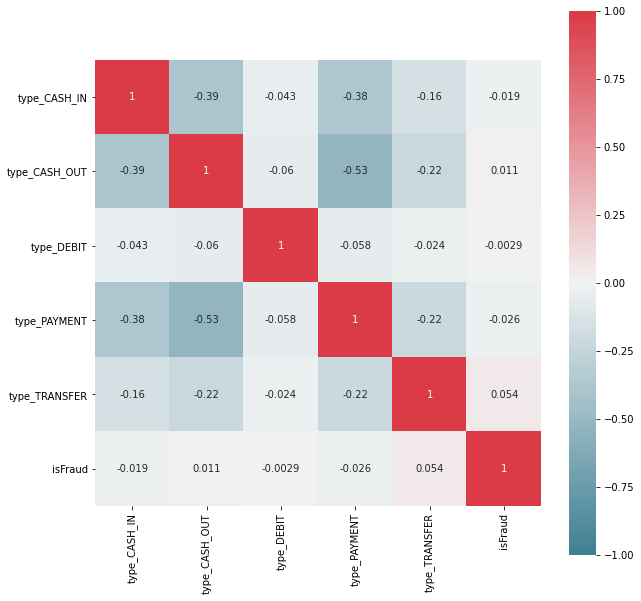

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
data_plot = pd.concat([type_dummy, fulldata['isFraud']], axis=1, sort=False)
corr = data_plot.corr()
sns.heatmap(corr,vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

## Data Transformation 
เป็นขั้นตอนในการแปลง data ก่อนเลือกใช้ algorithm สำหรับสร้าง model ML สำหรับเรียนรู้ข้อมูล อาจมีการปรับค่าต่างๆให้อยู่ในช่วงเดียวกัน หรือ หรือการทำพวก feature engineering เพื่อสร้าง attribute ใหม่ให้มีความสัมพันธ์กับ Label มากขึ้น

- **Capturing Feature Relationships:** เป็นการดำเนินการระหว่าง attribute เพื่อให้ได้ feature ใหม่ที่อาจเพิ่มประสิทธิภาพในการทำ model เช่นการ aggregate data หรือ การคำนวณค่าต่างๆระหว่าง attribute

In [13]:
## stripPlot function
import numpy as np
def plotStrip(y_name,x_list,data):
    plt.rcParams['figure.figsize'] = [10,10]
    n_attribute = len(x_list)
    nrow = 2
    ncol = np.ceil(n_attribute/nrow)
    ncol = np.where(ncol<2,2,ncol)
    fig, ax = plt.subplots(int(nrow), int(ncol))
    i=0
    for row in ax:
      for col in row:
          if i >= n_attribute:
            break
          sns.stripplot(ax=col,x=y_name,y=x_list[i],data=data)
          col.set_title(x_list[i], fontsize=10,color='black')
          i +=1
    plt.show()

In [11]:
columnlist = ['amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest']

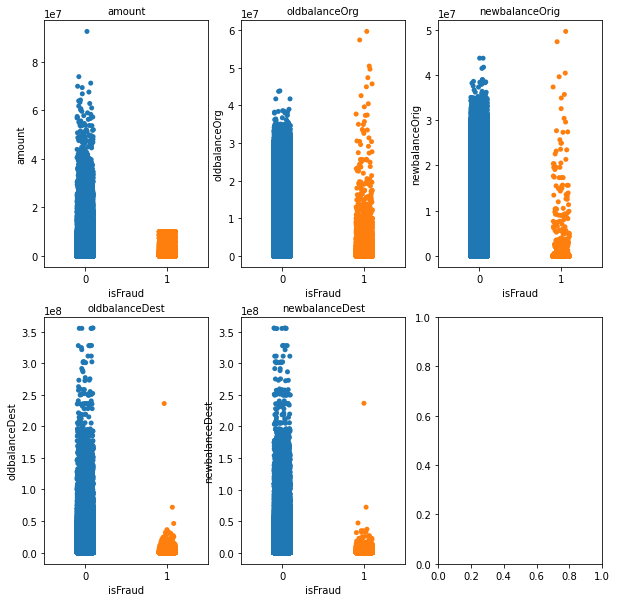

In [14]:
plotStrip('isFraud',columnlist,fulldata)

In [25]:
# หาค่า error ระหว่างค่า balance
fulldata['errorBalanceOrig'] = fulldata['newbalanceOrig'] + fulldata['amount'] - fulldata['oldbalanceOrg']
fulldata['errorBalanceDest'] = fulldata['oldbalanceDest'] + fulldata['amount'] - fulldata['newbalanceDest']
fulldata['ChangebalanceOrig'] = fulldata['newbalanceOrig'] - fulldata['oldbalanceOrg']
fulldata['ChangebalanceDest'] = fulldata['newbalanceDest'] - fulldata['oldbalanceDest'] 

In [26]:
capturelist = ['errorBalanceOrig','errorBalanceDest','ChangebalanceOrig','ChangebalanceDest']

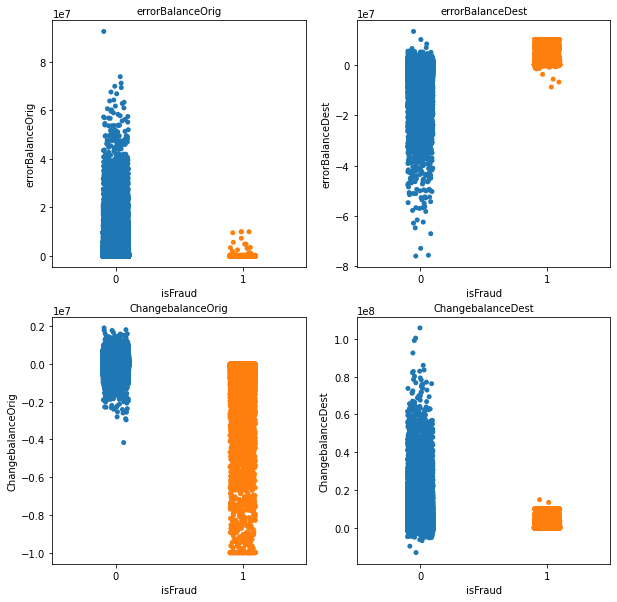

In [27]:
plotStrip('isFraud',capturelist,fulldata)

- **Scaling:** การปรับ data ให้อยู่ในช่วงเดียวกันเช่นการทำ normalization ให้อยู่ในช่วง [0,1] หรือ standardization ให้อยู่ในช่วง [-1,1] เป็นต้น

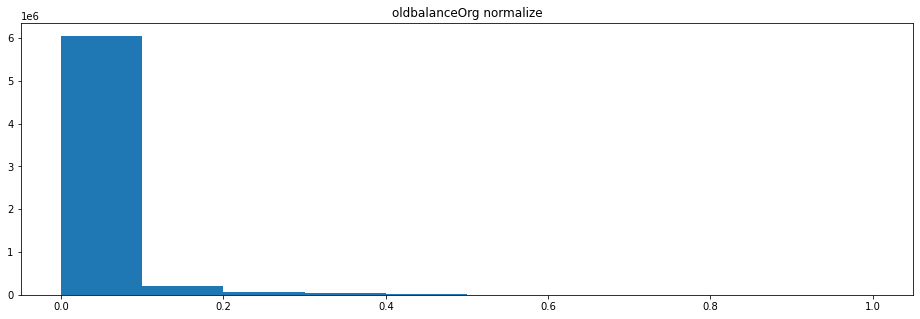

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fulldata['oldbalanceOrgNor'] = scaler.fit_transform(fulldata[['oldbalanceOrg']])

figure = plt.figure(figsize=(16, 5))
plt.hist(fulldata['oldbalanceOrgNor'])
plt.title("oldbalanceOrg normalize")
plt.show()

In [29]:
fulldata['newbalanceOrigNor'] = scaler.fit_transform(fulldata[['newbalanceOrig']])
fulldata['oldbalanceDestNor'] = scaler.fit_transform(fulldata[['oldbalanceDest']])
fulldata['newbalanceDestNor'] = scaler.fit_transform(fulldata[['newbalanceDest']])
fulldata['errorBalanceOrigNor'] = scaler.fit_transform(fulldata[['errorBalanceOrig']])
fulldata['errorBalanceDestNor'] = scaler.fit_transform(fulldata[['errorBalanceDest']])
fulldata['ChangebalanceOrigNor'] = scaler.fit_transform(fulldata[['ChangebalanceOrig']])
fulldata['ChangebalanceDestNor'] = scaler.fit_transform(fulldata[['ChangebalanceDest']])

In [30]:
selectAttribute = ['isFraud',
                   'oldbalanceOrgNor',
                   'newbalanceOrigNor',
                   'oldbalanceDestNor',
                   'newbalanceDestNor',
                   'errorBalanceOrigNor',
                   'errorBalanceDestNor',
                   'ChangebalanceOrigNor',
                   'ChangebalanceDestNor']

In [31]:
data = fulldata[selectAttribute]

In [32]:
data = pd.concat([data,type_dummy],axis=1,sort=False)

In [33]:
data.head()

isFraud  oldbalanceOrgNor  ...  type_PAYMENT  type_TRANSFER
0        0          0.002855  ...             1              0
1        0          0.000357  ...             1              0
2        1          0.000003  ...             0              1
3        1          0.000003  ...             0              0
4        0          0.000697  ...             1              0

[5 rows x 14 columns]

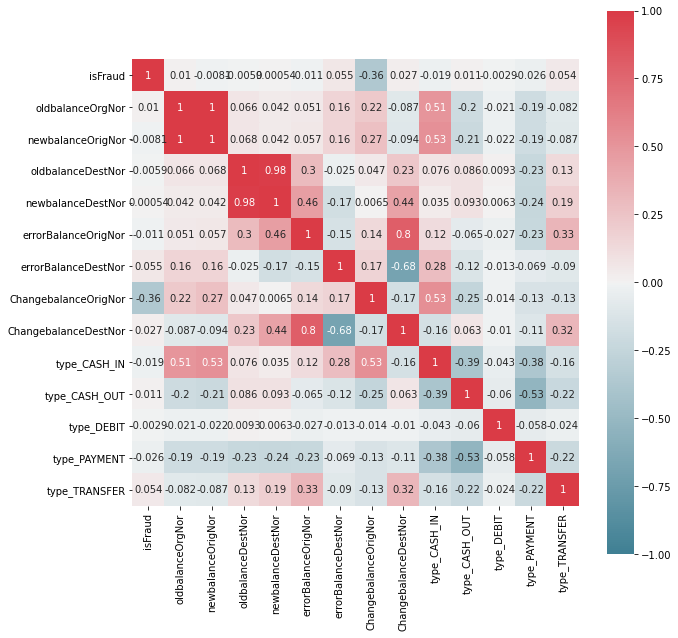

In [34]:
corr = data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()